In [1]:
import numpy as np
import matplotlib.pyplot as plt
from latexify import latexify

In [2]:
# header.stamp.nanosec, header.stamp.sec, pose.orientation.yaw, pose.position.x, pose.position.y
pose_M0 = np.genfromtxt('data_M0/optitrack_drone_pose.csv', delimiter=',', skip_header=1, usecols=[2,3,6,11,12], dtype=float)
pose_M0[:, 0] = pose_M0[:, 1] + pose_M0[:, 0] * 1e-9
# log_time_ns, x, y, yaw
control_state_ref_M0 = np.genfromtxt('data_M0/control_state_ref.csv', delimiter=',', skip_header=1, usecols=[0,4,5,6], dtype=float)
control_state_ref_M0[:, 0] *= 1e-9
# header.stamp.nanosec, header.stamp.sec, motor_a_1, motor_a_2, motor_b_1, motor_b_2, motor_c_1, motor_c_2
control_M0 = np.genfromtxt('data_M0/drone_control.csv', delimiter=',', skip_header=1, usecols=[2,3,4,5,6,7,8,9], dtype=float)
control_M0[:, 0] = control_M0[:, 1] + control_M0[:, 0] * 1e-9

In [3]:
# header.stamp.nanosec, header.stamp.sec, pose.orientation.yaw, pose.position.x, pose.position.y
pose_M4 = np.genfromtxt('data_M4/optitrack_drone_pose.csv', delimiter=',', skip_header=1, usecols=[2,3,6,11,12], dtype=float)
pose_M4[:, 0] = pose_M4[:, 1] + pose_M4[:, 0] * 1e-9
# log_time_ns, x, y, yaw
control_state_ref_M4 = np.genfromtxt('data_M4/control_state_ref.csv', delimiter=',', skip_header=1, usecols=[0,4,5,6], dtype=float)
control_state_ref_M4[:, 0] *= 1e-9
# header.stamp.nanosec, header.stamp.sec, motor_a_1, motor_a_2, motor_b_1, motor_b_2, motor_c_1, motor_c_2
control_M4 = np.genfromtxt('data_M4/drone_control.csv', delimiter=',', skip_header=1, usecols=[2,3,4,5,6,7,8,9], dtype=float)
control_M4[:, 0] = control_M4[:, 1] + control_M4[:, 0] * 1e-9

In [4]:
first_time_M0 = np.min(control_state_ref_M0[:, 0]) - 0.5
first_time_M4 = np.min(control_state_ref_M4[:, 0]) - 0.5
pose_M0[:, 0] -= first_time_M0
pose_M4[:, 0] -= first_time_M4
control_state_ref_M0[:, 0] -= first_time_M0
control_state_ref_M4[:, 0] -= first_time_M4
control_M0[:, 0] -= first_time_M0
control_M4[:, 0] -= first_time_M4

In [5]:
control_state_ref_M0 = np.pad(control_state_ref_M0, ((1, 1), (0, 0)), 'constant')
control_state_ref_M0[-1, 0] = np.max(pose_M0[:, 0])
control_state_ref_M4 = np.pad(control_state_ref_M4, ((1, 1), (0, 0)), 'constant')
control_state_ref_M4[-1, 0] = np.max(pose_M4[:, 0])

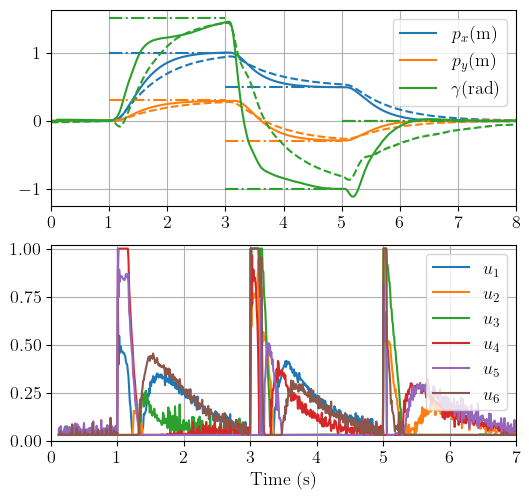

In [6]:
latexify()

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(2)

fig.set_figwidth(6)
fig.set_figheight(5.6)

axs[0].hlines(control_state_ref_M0[:, 1][:-1], control_state_ref_M0[:, 0][:-1], control_state_ref_M0[:, 0][1:], linestyles='-.', color=cycle[0], label=None)
axs[0].plot(pose_M0[:, 0], pose_M0[:, 3], ls='--', color=cycle[0])
axs[0].plot(pose_M4[:, 0], pose_M4[:, 3], label='$p_x (\si{m})$', ls='-', color=cycle[0])
axs[0].hlines(control_state_ref_M0[:, 2][:-1], control_state_ref_M0[:, 0][:-1], control_state_ref_M0[:, 0][1:], linestyles='-.', color=cycle[1], label=None)
axs[0].plot(pose_M0[:, 0], pose_M0[:, 4], ls='--', color=cycle[1])
axs[0].plot(pose_M4[:, 0], pose_M4[:, 4], label='$p_y (\si{m})$', ls='-', color=cycle[1])
axs[0].hlines(control_state_ref_M0[:, 3][:-1], control_state_ref_M0[:, 0][:-1], control_state_ref_M0[:, 0][1:], linestyles='-.', color=cycle[2], label=None)
axs[0].plot(pose_M0[:, 0], pose_M0[:, 2], ls='--', color=cycle[2])
axs[0].plot(pose_M4[:, 0], pose_M4[:, 2], label=r'$\gamma (\si{rad})$', ls='-', color=cycle[2])
axs[0].set_xlim(0., 8.)
axs[0].legend()
axs[0].grid()

axs[1].plot(control_M4[:, 0], control_M4[:, 2], label='$u_1$')
axs[1].plot(control_M4[:, 0], control_M4[:, 3], label='$u_2$')
axs[1].plot(control_M4[:, 0], control_M4[:, 4], label='$u_3$')
axs[1].plot(control_M4[:, 0], control_M4[:, 5], label='$u_4$')
axs[1].plot(control_M4[:, 0], control_M4[:, 6], label='$u_5$')
axs[1].plot(control_M4[:, 0], control_M4[:, 7], label='$u_6$')
axs[1].set_xlim(0., 7.)
axs[1].set_ylim(0., 1.02)
axs[1].set_xlabel(r'Time (s)')
axs[1].legend(loc='upper right')
axs[1].grid()
fig.savefig('control_lqr.pdf', bbox_inches='tight')